- **52100744 - Nguyễn Thế Anh**
- **52100782 - Lê Thị Phi Du**
- **52100910 - Nguyễn Quang Lợi**

In [1]:
# REMOVE this cell when submission
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/ML_Final
%pwd
%ls

Mounted at /content/drive
/content/drive/MyDrive/ML_Final
 energydata_complete.csv                         US_pollution_2018_2021.csv
'House appliances energy prediction (1).ipynb'  'US pollution prediction from 2018 to 2021.ipynb'
'House appliances energy prediction.ipynb'


In [2]:
from sklearn.model_selection import train_test_split

from sklearn.multioutput import MultiOutputRegressor

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import \
    mean_absolute_error as MAE, \
    r2_score as R2, \
    mean_squared_error as MSE

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data exploration and preprocessing

* **Problem Statement**: Develop a predictive model for air pollution levels in the United States. This task aims to offer valuable insights into the expected pollution levels, aiding decision-making for environmental planning, public health initiatives, and policy formulation.

* **Dataset**: "US Pollution from 2018 to 2021" comprising data on air quality with 24 features (details below).
* **Technique**: Regression

In [3]:
filename = 'US_pollution_2018_2021.csv'

# Read file and show number of rows and columns
df = pd.read_csv(filename)
df.shape

(113303, 24)

In [4]:
# Explore the first 5 rows in the dataset
df.head(5)

,Date,Year,Month,Day,Address,State,County,City,O3 Mean,O3 1st Max Value,...,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
0,2018-03-13,2018,3,13,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,0.041412,0.045,...,16,2,0.161905,0.4,15,0,6.509524,22.2,5,21
1,2018-03-14,2018,3,14,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,0.029882,0.050,...,0,2,0.200000,0.3,7,0,11.057143,37.7,22,35
2,2018-03-29,2018,3,29,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,0.033059,0.039,...,16,2,0.580000,2.8,3,3,6.925000,18.4,16,17
3,2018-03-30,2018,3,30,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,0.025294,0.043,...,23,3,0.116667,2.6,23,3,6.112500,26.3,23,25
4,2018-03-31,2018,3,31,"NO. B'HAM,SOU R.R., 3009 28TH ST. NO.",Alabama,Jefferson,Birmingham,0.032647,0.053,...,2,5,1.495833,4.5,1,6,12.383333,33.7,19,31


In [5]:
# types and columns
types = df.dtypes
columns = list(df.columns)
print(types.to_dict())

{'Date': dtype('O'), 'Year': dtype('int64'), 'Month': dtype('int64'), 'Day': dtype('int64'), 'Address': dtype('O'), 'State': dtype('O'), 'County': dtype('O'), 'City': dtype('O'), 'O3 Mean': dtype('float64'), 'O3 1st Max Value': dtype('float64'), 'O3 1st Max Hour': dtype('int64'), 'O3 AQI': dtype('int64'), 'CO Mean': dtype('float64'), 'CO 1st Max Value': dtype('float64'), 'CO 1st Max Hour': dtype('int64'), 'CO AQI': dtype('int64'), 'SO2 Mean': dtype('float64'), 'SO2 1st Max Value': dtype('float64'), 'SO2 1st Max Hour': dtype('int64'), 'SO2 AQI': dtype('int64'), 'NO2 Mean': dtype('float64'), 'NO2 1st Max Value': dtype('float64'), 'NO2 1st Max Hour': dtype('int64'), 'NO2 AQI': dtype('int64')}


In [6]:
 # Check missing data exists or not
print('Number of missing data:', df.isnull().sum().sum())

# Check duplicates
print('Number of duplicated data rows:', df.duplicated().sum())

Number of missing data: 0
Number of duplicated data rows: 763


In [7]:
# Remove duplicates
df = df.drop_duplicates()
print('After removing duplicates:')
print('- Duplicates:', df.duplicated().sum())
print('- Data shape:', df.shape)

After removing duplicates:
- Duplicates: 0
- Data shape: (112540, 24)


In [8]:
# Show the statistics of the dataset
df.describe()

,Year,Month,Day,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI
count,112540.000000,112540.000000,112540.000000,112540.000000,112540.00000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000,112540.000000
mean,2019.349289,6.230096,15.716563,0.029252,0.03864,10.733473,38.074205,0.252560,0.348656,5.247290,3.865070,0.450243,1.105891,8.944322,0.967087,8.916655,18.966110,11.250142,17.545602
std,1.055834,3.379495,8.793541,0.011341,0.01367,3.311750,19.442779,0.176474,0.263794,7.412841,3.111216,0.667504,1.760462,6.715541,2.486809,7.202345,12.801332,7.881254,12.044553
min,2018.000000,1.000000,1.000000,-0.000706,0.00000,7.000000,0.000000,-0.400000,-0.400000,0.000000,0.000000,-1.900000,-1.700000,0.000000,0.000000,-4.463636,-3.900000,0.000000,0.000000
25%,2018.000000,3.000000,8.000000,0.021118,0.02900,9.000000,27.000000,0.158333,0.200000,0.000000,2.000000,0.100000,0.300000,3.000000,0.000000,3.712500,8.500000,5.000000,8.000000
50%,2019.000000,6.000000,16.000000,0.029176,0.03800,10.000000,35.000000,0.208333,0.300000,0.000000,3.000000,0.308333,0.700000,8.000000,0.000000,6.941667,16.600000,8.000000,15.000000
75%,2020.000000,9.000000,23.000000,0.037118,0.04700,11.000000,44.000000,0.300000,0.400000,8.000000,5.000000,0.604348,1.300000,13.000000,1.000000,12.052174,27.700000,20.000000,25.000000
max,2021.000000,12.000000,31.000000,0.083200,0.11800,23.000000,214.000000,2.366667,3.800000,23.000000,43.000000,24.973913,59.000000,23.000000,80.000000,140.650000,269.200000,23.000000,133.000000


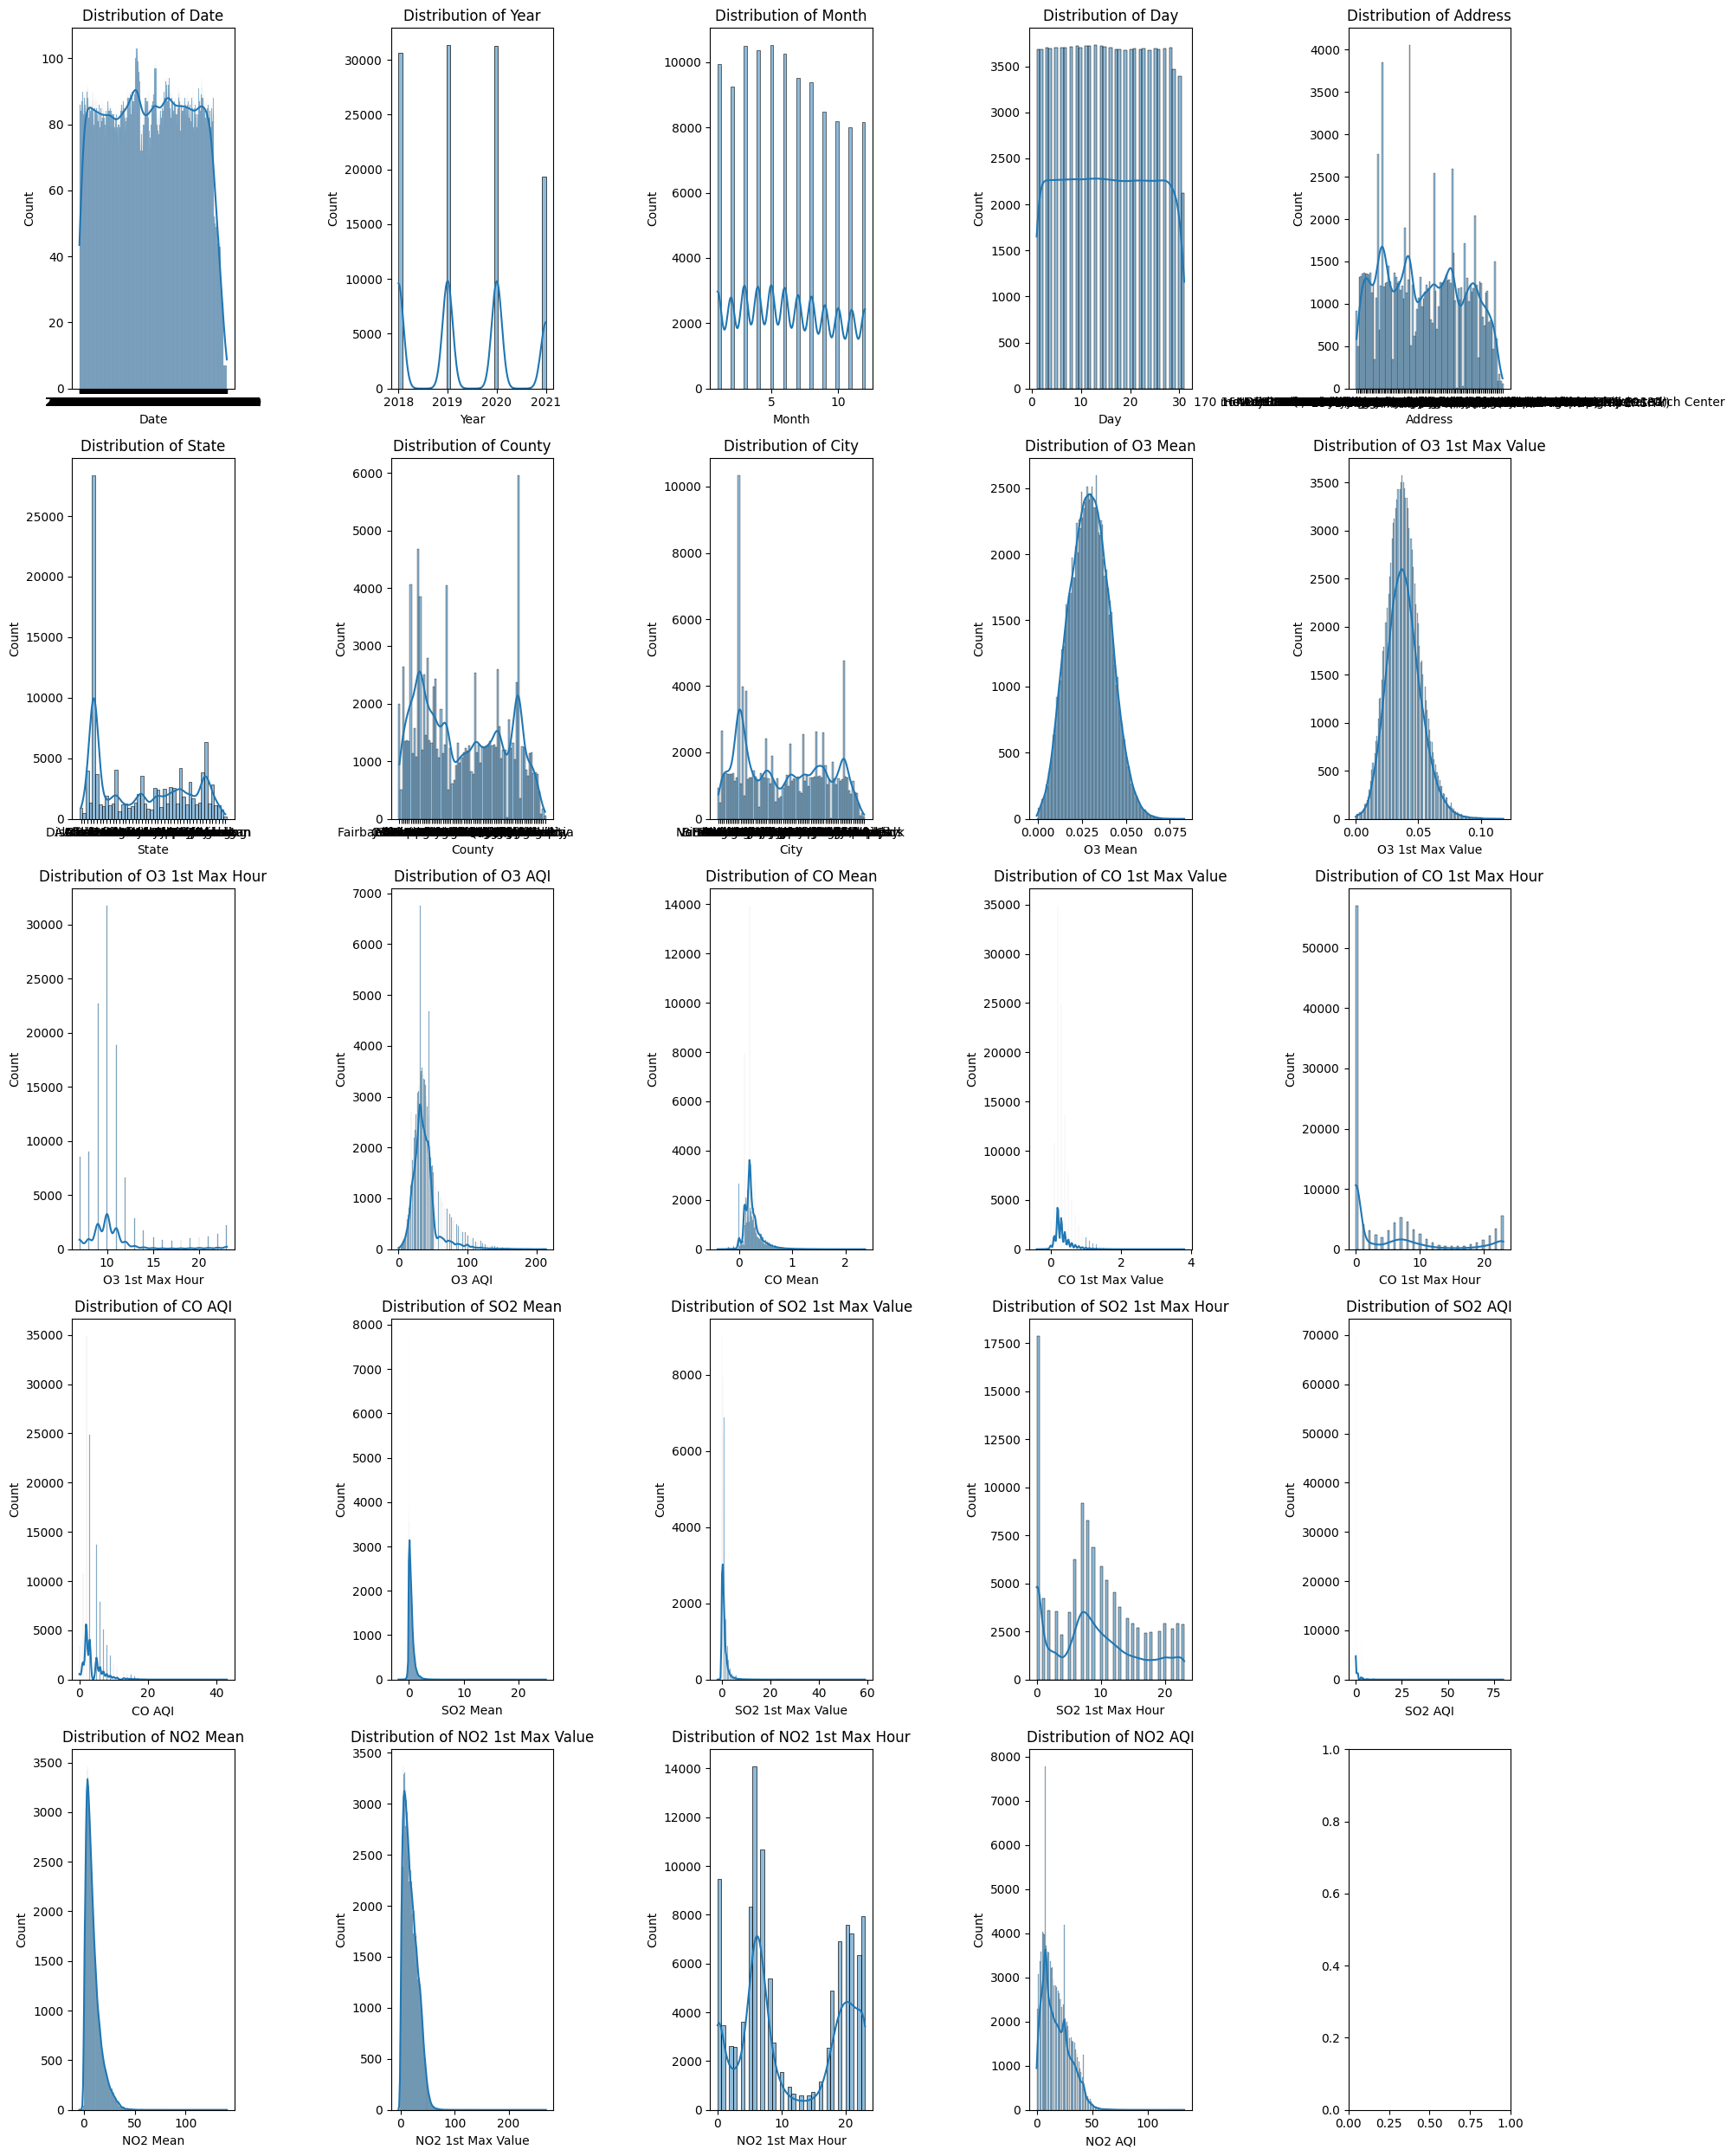

In [ ]:
# Plot the distribution chart for each column
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 25))

axes = axes.flatten()
for i, col in enumerate(columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

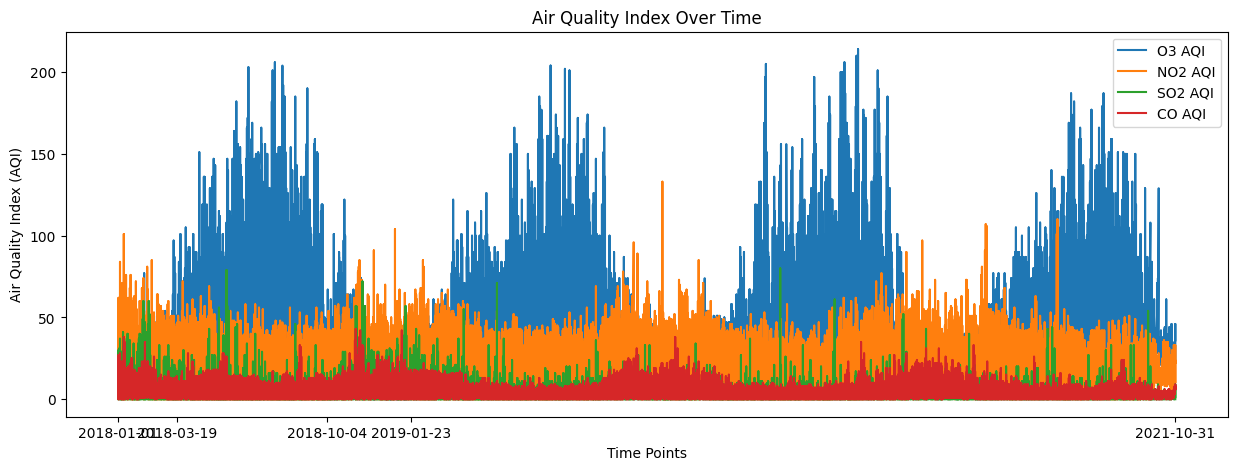

In [9]:
# Plot O3 AQI, NO2 AQI, SO2 AQI, CO AQI over time
df_sorted = df.sort_values(by='Date')
plt.figure(figsize=(15, 5))

time_points = df_sorted['Date'].values
# overall_aqi = df_sorted['Overall AQI'].values
o3_aqi = df_sorted['O3 AQI'].values
no2_aqi = df_sorted['NO2 AQI'].values
so2_aqi = df_sorted['SO2 AQI'].values
co_aqi = df_sorted['CO AQI'].values

plt.plot(time_points, o3_aqi, label='O3 AQI')
plt.plot(time_points, no2_aqi, label='NO2 AQI')
plt.plot(time_points, so2_aqi, label='SO2 AQI')
plt.plot(time_points, co_aqi, label='CO AQI')
plt.xlabel('Time Points')
plt.ylabel('Air Quality Index (AQI)')
plt.legend()
plt.title('Air Quality Index Over Time')
selected_time_points = [time_points[0]]
selected_time_points.extend(list(np.random.choice(time_points, size=3, replace=False)))
selected_time_points.append(time_points[-1])
plt.xticks(selected_time_points)

plt.show()

# Data preprocessing

In [ ]:
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression


from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

In [ ]:
object_cols = df.select_dtypes(include=['object']).columns.tolist()

le = LabelEncoder()
for col in object_cols:
    df[col] = le.fit_transform(df[col])

targets = ['O3 AQI', 'NO2 AQI', 'SO2 AQI', 'CO AQI']

data = df.values
X = df.drop(targets, axis=1)
y = df[targets].values

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X = X.values

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (90032, 24)
y_train shape: (90032, 4)
X_test shape: (22508, 24)
y_test shape: (22508, 4)


# Solve the problem by using basic machine learning models

**Bagging**

In [ ]:
from sklearn.ensemble import BaggingRegressor

bagging_reg = MultiOutputRegressor(
    BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=10, random_state=42))
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 0.00030211480362537753
Mean Squared Error: 0.0013515194597476458
R-squared Score: 0.9999694504982781

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 0.00035653989692553803
Mean Squared Error: 0.000552581304425094
R-squared Score: 0.9999492951550348


**AdaBoost**

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

adaboost_reg = MultiOutputRegressor(AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=50, random_state=42))
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared Score: 1.0

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 0.0002665718855518038
Mean Squared Error: 0.0010440732184112313
R-squared Score: 0.9998750289616489


**Gradient Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gradient_boost_reg = MultiOutputRegressor(GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42))

gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.003244007898362019
Mean Squared Error: 0.00019361152559703844
R-squared Score: 0.9999989857958944

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.0033205890870834725
Mean Squared Error: 0.0003009987801469386
R-squared Score: 0.9999889242327713


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

random_forest_reg = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.00022925182157455194
Mean Squared Error: 0.0007926592767016176
R-squared Score: 0.9999777214531612

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.00032399591256442235
Mean Squared Error: 0.000509844277590191
R-squared Score: 0.9999570798074824


**KNN**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn_reg = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=5))

knn_reg.fit(X_train, y_train)

y_pred_knn = knn_reg.predict(X_test)
y_pred_train_knn = knn_reg.predict(X_train)

print("KNN Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_knn))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_knn))
print("R-squared Score:", r2_score(y_train, y_pred_train_knn))

print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))

KNN Regressor Metrics on Training Set:
Mean Absolute Error: 1.5243213524080168
Mean Squared Error: 6.040725297671785
R-squared Score: 0.8785125720233314

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 1.914026124044784
Mean Squared Error: 9.44611338190877
R-squared Score: 0.806535583641496


**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression

linear_reg = MultiOutputRegressor(LinearRegression())

linear_reg.fit(X_train, y_train)

y_pred_linear = linear_reg.predict(X_test)
y_pred_train_linear = linear_reg.predict(X_train)

print("Linear Regression Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_linear))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_linear))
print("R-squared Score:", r2_score(y_train, y_pred_train_linear))

print("\nLinear Regression Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))


Linear Regression Metrics on Training Set:
Mean Absolute Error: 5.355617554563578e-14
Mean Squared Error: 7.798333138178019e-27
R-squared Score: 1.0

Linear Regression Metrics on Test Set:
Mean Absolute Error: 5.324785089970215e-14
Mean Squared Error: 7.697486958691264e-27
R-squared Score: 1.0


**Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

decision_tree_reg = MultiOutputRegressor(DecisionTreeRegressor(random_state=42))

decision_tree_reg.fit(X_train, y_train)

y_pred_decision_tree = decision_tree_reg.predict(X_test)
y_pred_train_decision_tree = decision_tree_reg.predict(X_train)

print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 0.0
Mean Squared Error: 0.0
R-squared Score: 1.0

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.0002443575617558202
Mean Squared Error: 0.0005997867424915585
R-squared Score: 0.9999847490348679


In [ ]:
model_names = ['Bagging', 'AdaBoost','Linear Regression', 'Decision Tree', 'KNN', 'Random Forest', 'Gradient Boosting']
mae_scores = [mean_absolute_error(y_test, y_pred_bagging),
              mean_absolute_error(y_test, y_pred_adaboost),
              mean_absolute_error(y_test, y_pred_linear),
              mean_absolute_error(y_test, y_pred_decision_tree),
              mean_absolute_error(y_test, y_pred_knn),
              mean_absolute_error(y_test, y_pred_random_forest),
              mean_absolute_error(y_test, y_pred_gradient_boost)]
mse_scores = [mean_squared_error(y_test, y_pred_bagging),
              mean_squared_error(y_test, y_pred_adaboost),
              mean_squared_error(y_test, y_pred_linear),
              mean_squared_error(y_test, y_pred_decision_tree),
              mean_squared_error(y_test, y_pred_knn),
              mean_squared_error(y_test, y_pred_random_forest),
              mean_squared_error(y_test, y_pred_gradient_boost)]
r2_scores = [r2_score(y_test, y_pred_bagging),
             r2_score(y_test, y_pred_adaboost),
             r2_score(y_test, y_pred_linear),
             r2_score(y_test, y_pred_decision_tree),
             r2_score(y_test, y_pred_knn),
             r2_score(y_test, y_pred_random_forest),
             r2_score(y_test, y_pred_gradient_boost)]

data = {
    'Model': model_names,
    'MAE': mae_scores,
    'MSE': mse_scores,
    'R-squared': r2_scores
}

comparison_df = pd.DataFrame(data)
print(comparison_df)


               Model           MAE           MSE  R-squared
0            Bagging  3.565399e-04  5.525813e-04   0.999949
1           AdaBoost  2.665719e-04  1.044073e-03   0.999875
2  Linear Regression  5.324785e-14  7.697487e-27   1.000000
3      Decision Tree  2.443576e-04  5.997867e-04   0.999985
4                KNN  1.914026e+00  9.446113e+00   0.806536
5      Random Forest  3.239959e-04  5.098443e-04   0.999957
6  Gradient Boosting  3.320589e-03  3.009988e-04   0.999989


**Summary**

Based on the performance benchmark, the AdaBoost model appears to be the best among the evaluated models
- AdaBoost has the lowest values for both MAE and MSE, indicating high accuracy in predictions.
- AdaBoost also has the highest R-squared value, approaching 1, indicating the model's ability to explain variance in the data well.

# Solve the problem by using FFNN and LSTM

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
# Plot the training process
def plot_training_process(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training Process')
    plt.xlabel('Epoch')
    plt.ylabel('Mean Squared Error')
    plt.legend()
    plt.show()

## Feed Forward Neural Network (FFNN)

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(4, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=16
)

Epoch 1/20
5065/5065 [==============================] - 14s 3ms/step - loss: 129.5239 - val_loss: 1.0043
Epoch 2/20
5065/5065 [==============================] - 12s 2ms/step - loss: 0.4330 - val_loss: 0.2278
Epoch 3/20
5065/5065 [==============================] - 13s 2ms/step - loss: 0.4556 - val_loss: 2.4857
Epoch 4/20
5065/5065 [==============================] - 17s 3ms/step - loss: 0.3816 - val_loss: 0.5502
Epoch 5/20
5065/5065 [==============================] - 12s 2ms/step - loss: 0.3388 - val_loss: 0.2353
Epoch 6/20
5065/5065 [==============================] - 11s 2ms/step - loss: 0.3056 - val_loss: 0.0323
Epoch 7/20
5065/5065 [==============================] - 12s 2ms/step - loss: 0.3071 - val_loss: 0.0782
Epoch 8/20
5065/5065 [==============================] - 11s 2ms/step - loss: 0.2558 - val_loss: 0.0545
Epoch 9/20
5065/5065 [==============================] - 10s 2ms/step - loss: 0.2564 - val_loss: 0.1010
Epoch 10/20
5065/5065 [==============================] - 11s 2ms/step -

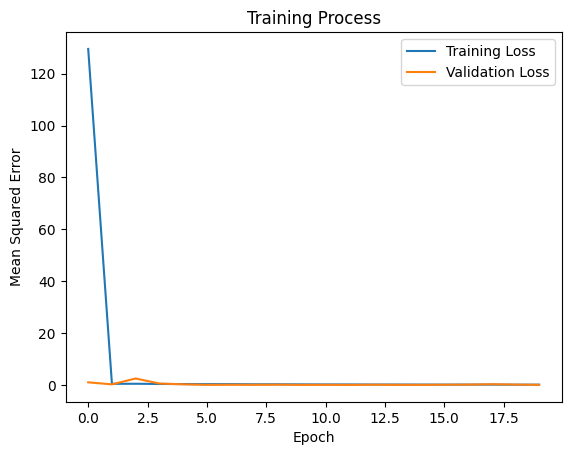

In [ ]:
plot_training_process(history)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

704/704 [==============================] - 2s 2ms/step
Mean Squared Error: 0.04087614230006971
Mean Squared Error: 0.04087614230006971
R-squared Score: 0.9984761308000267


## Long Short Time Memory (LSTM)

In [ ]:
X_train.shape

(90032, 24)

In [ ]:
# Reshape the data for LSTM input (samples, time steps, features)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [ ]:
X_train_reshaped.shape

(90032, 1, 24)

In [ ]:
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True))
model.add(LSTM(16, return_sequences=True))
model.add(LSTM(32, return_sequences=True))
model.add(LSTM(8))
model.add(Dense(4))

model.compile(optimizer='adam', loss='mean_squared_error')
history = model.fit(
    X_train_reshaped, y_train,
    validation_split = 0.1,
    epochs=20,
    batch_size=32
)

Epoch 1/20
2533/2533 [==============================] - 36s 9ms/step - loss: 343.4160 - val_loss: 215.5777
Epoch 2/20
2533/2533 [==============================] - 23s 9ms/step - loss: 178.6088 - val_loss: 137.7251
Epoch 3/20
2533/2533 [==============================] - 24s 9ms/step - loss: 139.3366 - val_loss: 127.4729
Epoch 4/20
2533/2533 [==============================] - 23s 9ms/step - loss: 136.2052 - val_loss: 127.4693
Epoch 5/20
2533/2533 [==============================] - 20s 8ms/step - loss: 114.1412 - val_loss: 91.2944
Epoch 6/20
2533/2533 [==============================] - 20s 8ms/step - loss: 94.6330 - val_loss: 84.1957
Epoch 7/20
2533/2533 [==============================] - 23s 9ms/step - loss: 90.8175 - val_loss: 82.6188
Epoch 8/20
2533/2533 [==============================] - 23s 9ms/step - loss: 88.7714 - val_loss: 89.2744
Epoch 9/20
2533/2533 [==============================] - 24s 9ms/step - loss: 82.9073 - val_loss: 95.1720
Epoch 10/20
2533/2533 [=======================

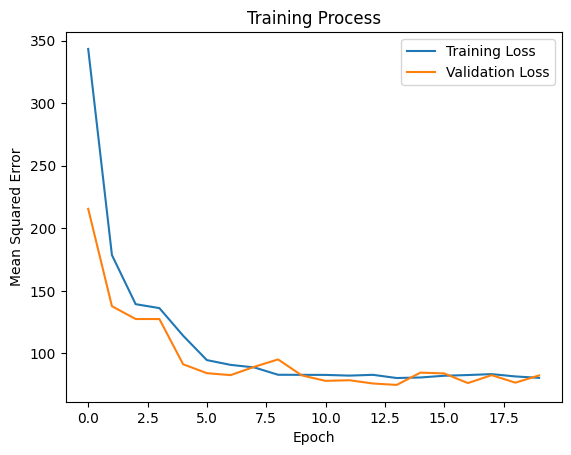

In [ ]:
plot_training_process(history)

In [ ]:
# Evaluate the model
y_pred = model.predict(X_test_reshaped)

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))

704/704 [==============================] - 4s 3ms/step
Mean Squared Error: 84.81724287782887
Mean Squared Error: 84.81724287782887
R-squared Score: 0.13110227534538152


# Apply techniques to avoid Overfitting in the models


**Bagging**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
bagging_reg = BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=200, random_state=42)
bagging_reg.fit(X_train, y_train)

y_pred_bagging = bagging_reg.predict(X_test)
y_pred_train = bagging_reg.predict(X_train)

print("Bagging Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train))
print("R-squared Score:", r2_score(y_train, y_pred_train))

print("\nBagging Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_bagging))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_bagging))
print("R-squared Score:", r2_score(y_test, y_pred_bagging))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging Regressor Metrics on Training Set:
Mean Absolute Error: 1.474952164871087
Mean Squared Error: 4.6656555582280275
R-squared Score: 0.9867270306308051

Bagging Regressor Metrics on Test Set:
Mean Absolute Error: 1.4572865556004628
Mean Squared Error: 4.31462436127051
R-squared Score: 0.9873542644395016


**AdaBoost**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
adaboost_reg = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=5), n_estimators=100, learning_rate=0.1, random_state=42)
adaboost_reg.fit(X_train, y_train)

y_pred_adaboost = adaboost_reg.predict(X_test)
y_pred_train_adaboost = adaboost_reg.predict(X_train)

print("AdaBoost Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_adaboost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_adaboost))
print("R-squared Score:", r2_score(y_train, y_pred_train_adaboost))

print("\nAdaBoost Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_adaboost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_adaboost))
print("R-squared Score:", r2_score(y_test, y_pred_adaboost))


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


AdaBoost Regressor Metrics on Training Set:
Mean Absolute Error: 1.463771044104667
Mean Squared Error: 3.85322067476554
R-squared Score: 0.989038264966063

AdaBoost Regressor Metrics on Test Set:
Mean Absolute Error: 1.4592544344484386
Mean Squared Error: 3.7825942382394535
R-squared Score: 0.9889135918994915


**Gradient Boosting**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
gradient_boost_reg = GradientBoostingRegressor(n_estimators=200, learning_rate=0.05, max_depth=5, random_state=42)
gradient_boost_reg.fit(X_train, y_train)

y_pred_gradient_boost = gradient_boost_reg.predict(X_test)
y_pred_train_gradient_boost = gradient_boost_reg.predict(X_train)

print("Gradient Boosting Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_gradient_boost))
print("R-squared Score:", r2_score(y_train, y_pred_train_gradient_boost))

print("\nGradient Boosting Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_gradient_boost))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gradient_boost))
print("R-squared Score:", r2_score(y_test, y_pred_gradient_boost))


Gradient Boosting Regressor Metrics on Training Set:
Mean Absolute Error: 0.04992238205049121
Mean Squared Error: 0.015313342655654375
R-squared Score: 0.9999564362337785

Gradient Boosting Regressor Metrics on Test Set:
Mean Absolute Error: 0.05236373443183637
Mean Squared Error: 0.02834406806530695
R-squared Score: 0.9999169263510678


**Random Forest**

Adjust hyperparameters

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Adjust hyperparameters
random_forest_reg = RandomForestRegressor(n_estimators=100, max_depth=10, min_samples_split=5, min_samples_leaf=5, random_state=42)
random_forest_reg.fit(X_train, y_train)

y_pred_random_forest = random_forest_reg.predict(X_test)
y_pred_train_random_forest = random_forest_reg.predict(X_train)

print("Random Forest Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_random_forest))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_random_forest))
print("R-squared Score:", r2_score(y_train, y_pred_train_random_forest))

print("\nRandom Forest Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_random_forest))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_random_forest))
print("R-squared Score:", r2_score(y_test, y_pred_random_forest))


Random Forest Regressor Metrics on Training Set:
Mean Absolute Error: 0.04838568966760157
Mean Squared Error: 0.23619889606339708
R-squared Score: 0.9993280556883463

Random Forest Regressor Metrics on Test Set:
Mean Absolute Error: 0.044656480634160625
Mean Squared Error: 0.16637715149980173
R-squared Score: 0.9995123650902125


**KNN**

Hyperparameter Tuning, Cross-Validation

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV, cross_val_score

# Hyperparameter tuning to find optimal n_neighbors
param_grid = {'n_neighbors': range(3, 11)}
grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
knn_reg = grid_search.best_estimator_

# Cross-validation to evaluate model generalization
scores = cross_val_score(knn_reg, X_train, y_train, cv=5, scoring='r2')
print("Cross-validation R-squared scores:", scores)

# Train the model on the entire training set
knn_reg.fit(X_train, y_train)

# Evaluate on test set
y_pred_knn = knn_reg.predict(X_test)
print("\nKNN Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_knn))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_knn))
print("R-squared Score:", r2_score(y_test, y_pred_knn))


Cross-validation R-squared scores: [0.95796381 0.95980741 0.95788792 0.95856807 0.95629878]

KNN Regressor Metrics on Test Set:
Mean Absolute Error: 2.7308179314021683
Mean Squared Error: 13.506800359872045
R-squared Score: 0.9604129093710744


**Linear Regression**

Hyperparameter tuning with regularization

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.feature_selection import RFE

# Hyperparameter tuning with regularization
param_grid = {'alpha': [0.1, 0.5, 1, 2, 5]}
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)  # Using Ridge regression
grid_search.fit(X_train, y_train)
linear_reg = grid_search.best_estimator_

# Feature selection with RFE
rfe = RFE(linear_reg, n_features_to_select=10)  # Adjust n_features_to_select
X_train_selected = rfe.fit_transform(X_train, y_train)
X_test_selected = rfe.transform(X_test)

# Train the model on selected features
linear_reg.fit(X_train_selected, y_train)

# Evaluate on test set
y_pred_linear = linear_reg.predict(X_test_selected)
print("\nLinear Regression Metrics on Test Set (After Overfitting Prevention):")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_linear))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_linear))
print("R-squared Score:", r2_score(y_test, y_pred_linear))



Linear Regression Metrics on Test Set (After Overfitting Prevention):
Mean Absolute Error: 2.24399915090587
Mean Squared Error: 11.006452513634535
R-squared Score: 0.9677411806237474


**Decision Tree**

Define the parameter grid

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Decision Tree regressor
decision_tree_reg = DecisionTreeRegressor(random_state=42)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(decision_tree_reg, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Create a Decision Tree regressor with the best parameters
best_decision_tree_reg = DecisionTreeRegressor(**best_params, random_state=42)

best_decision_tree_reg.fit(X_train, y_train)

# Predictions on training and test sets
y_pred_train_decision_tree = best_decision_tree_reg.predict(X_train)
y_pred_decision_tree = best_decision_tree_reg.predict(X_test)

# Evaluate the model
print("Decision Tree Regressor Metrics on Training Set:")
print("Mean Absolute Error:", mean_absolute_error(y_train, y_pred_train_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_train, y_pred_train_decision_tree))
print("R-squared Score:", r2_score(y_train, y_pred_train_decision_tree))

print("\nDecision Tree Regressor Metrics on Test Set:")
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred_decision_tree))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_decision_tree))
print("R-squared Score:", r2_score(y_test, y_pred_decision_tree))


Decision Tree Regressor Metrics on Training Set:
Mean Absolute Error: 0.5168708698639163
Mean Squared Error: 1.0752370553210517
R-squared Score: 0.9969411397129968

Decision Tree Regressor Metrics on Test Set:
Mean Absolute Error: 0.5015883834532274
Mean Squared Error: 0.9892635854909342
R-squared Score: 0.9971005666648428


Feed Forward Neural Network (FFNN)

Use L2 Regularization, Early Stopping techniques

Epoch 1/20
5065/5065 [==============================] - 7s 1ms/step - loss: 133.9475 - val_loss: 14.2590
Epoch 2/20
5065/5065 [==============================] - 6s 1ms/step - loss: 14.4771 - val_loss: 7.6032
Epoch 3/20
5065/5065 [==============================] - 7s 1ms/step - loss: 3.9125 - val_loss: 2.3460
Epoch 4/20
5065/5065 [==============================] - 6s 1ms/step - loss: 1.2463 - val_loss: 0.7556
Epoch 5/20
5065/5065 [==============================] - 7s 1ms/step - loss: 0.7757 - val_loss: 0.3587
Epoch 6/20
5065/5065 [==============================] - 7s 1ms/step - loss: 0.6615 - val_loss: 0.4216
Epoch 7/20
5065/5065 [==============================] - 6s 1ms/step - loss: 0.6787 - val_loss: 0.3332
Epoch 8/20
5065/5065 [==============================] - 9s 2ms/step - loss: 0.6378 - val_loss: 0.4352
Epoch 9/20
5065/5065 [==============================] - 8s 2ms/step - loss: 0.6052 - val_loss: 0.2302
Epoch 10/20
5065/5065 [==============================] - 7s 1ms/step - loss: 0

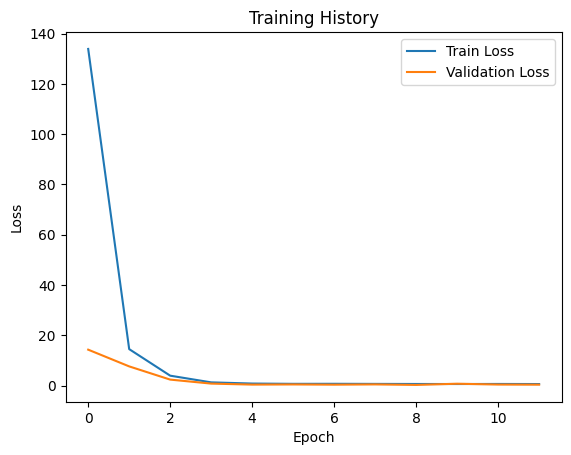

704/704 [==============================] - 1s 843us/step
Mean Squared Error: 0.2533346681157953
R-squared Score: 0.9992575012438961


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Define the model
model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1], activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=16,
    callbacks=[early_stopping]
)

# Plot training history
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluate the model
y_pred = model.predict(X_test).flatten()

print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Long Short Time Memory (LSTM)

Use Early Stopping techniques

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import EarlyStopping
from keras.regularizers import l2

model = Sequential()
model.add(LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]),
               return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(LSTM(16, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(LSTM(32, return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(LSTM(8, kernel_regularizer=l2(0.01)))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Define EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history = model.fit(
    X_train_reshaped, y_train,
    validation_split=0.1,
    epochs=20,
    batch_size=32,
    callbacks=[early_stopping]
)

# Evaluate the model on the test set
y_pred = model.predict(X_test_reshaped).flatten()

# Print evaluation metrics
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared Score:", r2_score(y_test, y_pred))


Epoch 1/20
2533/2533 [==============================] - 18s 5ms/step - loss: 1117.5228 - val_loss: 677.0931
Epoch 2/20
2533/2533 [==============================] - 12s 5ms/step - loss: 528.8605 - val_loss: 366.6430
Epoch 3/20
2533/2533 [==============================] - 12s 5ms/step - loss: 368.8707 - val_loss: 323.4773
Epoch 4/20
2533/2533 [==============================] - 11s 5ms/step - loss: 311.7747 - val_loss: 204.4552
Epoch 5/20
2533/2533 [==============================] - 12s 5ms/step - loss: 200.4010 - val_loss: 148.2154
Epoch 6/20
2533/2533 [==============================] - 12s 5ms/step - loss: 129.8968 - val_loss: 88.2851
Epoch 7/20
2533/2533 [==============================] - 12s 5ms/step - loss: 91.0689 - val_loss: 61.9002
Epoch 8/20
2533/2533 [==============================] - 12s 5ms/step - loss: 71.0423 - val_loss: 53.0638
Epoch 9/20
2533/2533 [==============================] - 12s 5ms/step - loss: 56.3123 - val_loss: 68.9329
Epoch 10/20
2533/2533 [====================

# Methods to Improve Prediction Model Accuracy

### 1. Tuning Hyperparameters

Adjusting the model's parameters to optimize performance. For example:
- Changing the number of trees in a RandomForest model.
- Increasing LSTM layers and adjusting the learning rate in a Neural Network model.

### 2. Feature Engineering

Creating or selecting better features can enhance the model. This includes:
- Removing or adding new features.
- Feature combination.
- Handling missing data.
- Using better encoding techniques for classification data.

### 3. Cross-Validation

Using cross-validation to evaluate the model on various data portions and prevent overfitting.

### 4. Ensemble Learning

Combining multiple predictive models to create a stronger one. For instance: Bagging, Boosting, Stacking.

### 5. Regularization

Using regularization techniques like L1 or L2 regularization to prevent overfitting and enhance the model's generalization.

### 6. Early Stopping

Halting the training process when there isn't significant improvement on the validation set to prevent overfitting.

### 7. Handling Missing Data

Dealing with missing data sensibly instead of discarding it or filling it with average values.

### 8. Feature Scaling

Scaling features can enhance the model's performance, especially with models like KNN, Neural Networks.

### 9. Adding Data

If possible, adding new data or expanding the dataset can improve the model's predictive ability.

Each improvement step can be applied to specific problems and datasets, often requiring experimentation and evaluation to determine the most effective approach for your model.


# Conclusion

The methods outlined for improving the accuracy of predictive models have been integrated during model execution. Enhancing the predictive accuracy of a model brings about several significant benefits.

- Firstly, it elevates the model's performance, ensuring more accurate predictions on new data and reducing errors, thereby increasing confidence in prediction outcomes.

- Secondly, heightened accuracy fosters greater reliability—users and stakeholders place more trust in a model as its accuracy improves, making the model more transparent and comprehensible in its decisions.

- Thirdly, improving accuracy aids in optimizing data utilization, saving time and costs while providing a clearer assessment of the model's quality. Ultimately, enhancing accuracy not only boosts predictive efficiency but also facilitates more effective communication, encouraging continual model development by advancing the knowledge and skills of the development team.

